In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv("spotify_dataset.csv")
print(df.head())
print(df.tail())
print(df.shape)

   Index  Highest Charting Position  Number of Times Charted  \
0      1                          1                        8   
1      2                          2                        3   
2      3                          1                       11   
3      4                          3                        5   
4      5                          5                        1   

  Week of Highest Charting                          Song Name     Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48,633,449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47,248,719   
2   2021-06-25--2021-07-02                           good 4 u  40,162,559   
3   2021-07-02--2021-07-09                         Bad Habits  37,799,456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33,948,454   

           Artist Artist Followers                 Song ID  \
0        Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI          2

In [29]:
df.replace(' ', np.nan, inplace=True)
df.dropna(inplace=True)
print(df.shape)

(1545, 23)


In [31]:
df['Loudness'] = df['Loudness'].astype(float)
column='Loudness'
df['Normalized_loud'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
print(df['Normalized_loud'])

0       0.763187
1       0.737844
2       0.754339
3       0.804274
4       0.665679
          ...   
1551    0.717713
1552    0.826354
1553    0.780993
1554    0.680037
1555    0.674414
Name: Normalized_loud, Length: 1545, dtype: float64


[ 1. 12.] 1 142


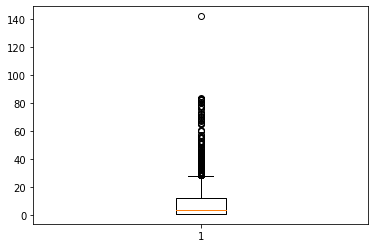

In [4]:
import matplotlib.pyplot as plt
from numpy import percentile
temp = df['Number of Times Charted']
plt.boxplot(temp)
quartiles = percentile(temp, [25, 75])
data_min, data_max = temp.min(), temp.max()
print(quartiles, data_min, data_max)

# We can see that the data is heavily skewed. Since there are so many low values
# the higher values seem like a lot of outliers

[ 37. 137.]
1 200


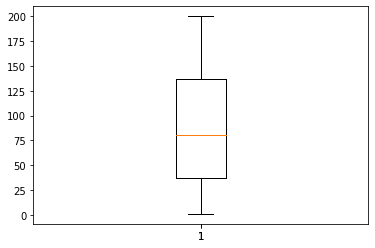

In [5]:
plt.boxplot(df['Highest Charting Position'])
temp = df['Highest Charting Position']
plt.boxplot(temp)
quartiles = percentile(temp, [25, 75])
data_min, data_max = temp.min(), temp.max()
print(quartiles)
print(data_min, data_max)

# very well balanced

{'whiskers': [<matplotlib.lines.Line2D at 0x1549b0f50d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1549b0f57f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1549b0e3d00>,
 'medians': [<matplotlib.lines.Line2D at 0x1549b0f5f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1549b1012e0>,
 'means': []}

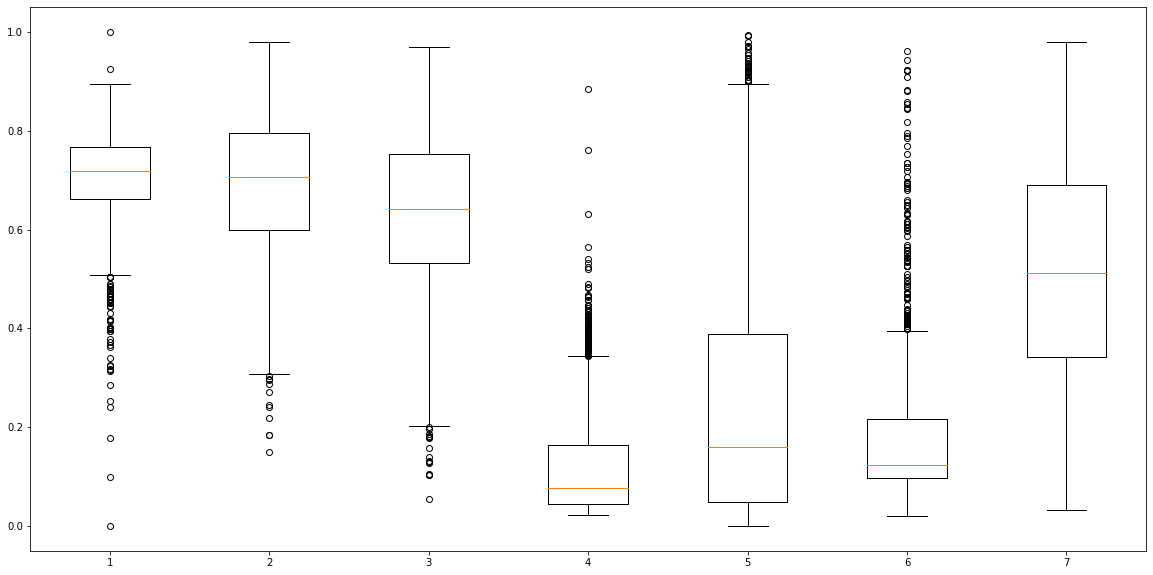

In [6]:
plt.figure(figsize=(20, 10))
plt.boxplot(df[['Normalized_loud', 'Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Liveness', 'Valence']].astype(float))
# By plotting the coloumns with values ranging [0, 1] together it makes it easier ti see skews in the data set

[ 2123734. 22698747.]
4883 83337783


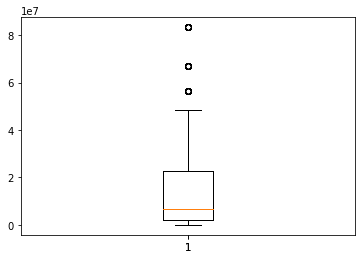

In [7]:
plt.boxplot(df['Artist Followers'].astype(int))
temp = df['Artist Followers'].astype(int)
plt.boxplot(temp)
quartiles = percentile(temp, [25, 75])
data_min, data_max = temp.min(), temp.max()
print(quartiles)
print(data_min, data_max)

# This is a very good set of data, the outliers would be the really famous artists

[65. 80.]
0 100


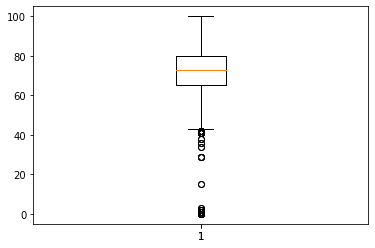

In [8]:
plt.boxplot(df['Popularity'].astype(int))
temp = df['Popularity'].astype(int)
plt.boxplot(temp)
quartiles = percentile(temp, [25, 75])
data_min, data_max = temp.min(), temp.max()
print(quartiles)
print(data_min, data_max)

# Since most of the values are in the higher numbers we can conclude that most of the songs are very popular
# is is more uncommon to find a unpopular song meaning this dataset is on the popular songs

Text(0, 0.5, 'Song Popularity')

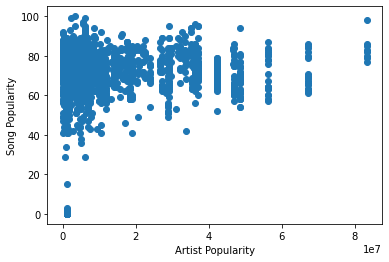

In [9]:
plt.scatter(df['Artist Followers'].astype(int), df['Popularity'].astype(int))
plt.xlabel('Artist Popularity')
plt.ylabel('Song Popularity')

# There is a slight trend in the relationship between Song popularity and Artist popularity.
# If the artist is popular it is more likely their song will be popular

Text(0, 0.5, 'Song Popularity')

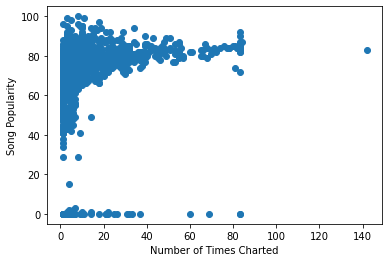

In [10]:
plt.scatter(df['Number of Times Charted'].astype(int), df['Popularity'].astype(int))
plt.xlabel('Number of Times Charted')
plt.ylabel('Song Popularity')

# There seems to be a slight positive correlation, however there are some
# songs who were charted multiple times, but not popular

In [32]:
# Remove outliers to make the RSME score better
df.shape

(1545, 24)

In [33]:
modify_cols = ['Number of Times Charted', 'Popularity', 'Artist Followers']
Q1 = df[modify_cols].quantile(0.25)
Q3 = df[modify_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[modify_cols] < (Q1 - 1.5 * IQR)) |(df[modify_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\seang\AppData\Local\Temp/ipykernel_22256/1715832430.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[modify_cols] < (Q1 - 1.5 * IQR)) |(df[modify_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


(1375, 24)

In [34]:
df.to_csv('pop_input.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("pop_input.csv")
display(df.head())
display(df.info())

,Unnamed: 0,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Normalized_loud
0,0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,...,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B,0.763187
1,1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,...,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db,0.737844
2,2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,...,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A,0.754339
3,3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,...,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B,0.804274
4,4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,...,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,0.665679


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1375 non-null   int64  
 1   Index                      1375 non-null   int64  
 2   Highest Charting Position  1375 non-null   int64  
 3   Number of Times Charted    1375 non-null   int64  
 4   Week of Highest Charting   1375 non-null   object 
 5   Song Name                  1375 non-null   object 
 6   Streams                    1375 non-null   object 
 7   Artist                     1375 non-null   object 
 8   Artist Followers           1375 non-null   int64  
 9   Song ID                    1375 non-null   object 
 10  Genre                      1375 non-null   object 
 11  Release Date               1375 non-null   object 
 12  Weeks Charted              1375 non-null   object 
 13  Popularity                 1375 non-null   int64

None

In [3]:
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import Normalizer

#X = np.c_[df['Artist Followers'], df['Highest Charting Position']]#df['Number of Times Charted']
X = np.c_[df['Highest Charting Position'],df['Number of Times Charted']]
y = np.c_[df['Popularity']]


X_train, X_test, y_train, y_test = train_test_split(X, y)

# instantiate a simple linear regression model 
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)
print(X)
print(y)

[[  1   8]
 [  2   3]
 [  1  11]
 ...
 [197   1]
 [198   1]
 [199   1]]
[[100]
 [ 99]
 [ 99]
 ...
 [ 81]
 [ 60]
 [ 70]]


In [38]:
# train data R2
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
# test data R2
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

X_b = np.c_[np.ones((1375, 1)), X]  # add x0 = 1 to each data tuple
y_b = y.reshape(1375, 1)

transformer = Normalizer().fit(X_b)
X_b = transformer.transform(X_b)
transformer = Normalizer().fit(y_b)
y_b = transformer.transform(y_b)

print(X_b.shape, '\n', y_b.shape)

R-squared score (training): 0.060
R-squared score (test): 0.046
RMSE: 13.966
(1375, 3) 
 (1375, 1)


In [24]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[-0.89792325],
       [64.92484143],
       [52.32232385]])

In [25]:
# learning rate
alpha = 0.001

# number of iterations
n_iteration = 100

# the number of data points
n = 100

# random initialization to theta. 
# Return samples (2 values for theta0 for x0 and theta1 for x1) 
# from the “standard normal” distribution.
theta = np.random.randn(2, 1)

print('initial theta: \n', theta, theta.shape)

initial theta: 
 [[1.20497065]
 [0.67242502]] (2, 1)


In [26]:
# # the process of gradient descent
# for iteration in range(n_iteration):
#     gradient = (1/n) * X_b.T.dot(X_b.dot(theta) - y_b)
#     theta = theta - alpha*gradient
    
    
# print('best theta: \n', theta)

# # we will need to tune with learning rate alpha and # of iterations
# # to find out the optimal theta value

In [20]:
#Linear regression without regularization

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('Popularity Dataset')
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

Popularity Dataset
R-squared score (training): 0.061
R-squared score (test): 0.047
RMSE: 16.183
linear model intercept: [67.95273886]
linear model coeff:
[[-0.01549819  0.47065825]]
Number of non-zero features: 2


In [7]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Popularity Dataset Ridge')

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Popularity Dataset Ridge
R-squared score (training): 0.061
R-squared score (test): 0.047
RMSE: 16.182
ridge regression linear model intercept: [67.95522053]
ridge regression linear model coeff:
[[-0.01550951  0.47042406]]
Number of non-zero features: 2


In [8]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linridge = Lasso(alpha=20.0).fit(X_train, y_train)

print('Popularity Dataset Lasso')

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('lasso regression linear model intercept: {}'.format(linridge.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Popularity Dataset Lasso
R-squared score (training): 0.021
R-squared score (test): 0.010
RMSE: 16.182
lasso regression linear model intercept: [72.36543368]
lasso regression linear model coeff:
[-0.03227093  0.        ]
Number of non-zero features: 1


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Cancer Dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Cancer Dataset
R-squared score (training): 0.059
R-squared score (test): 0.044
RMSE: 16.183
ridge regression linear model intercept: [69.11258015]
ridge regression linear model coeff:
[[-3.38456732  9.64382003]]
Number of non-zero features: 2


In [24]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 0.01, 0.1, 0.5, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 2, r-squared training: 0.06, r-squared test: 0.05

Alpha = 0.01
num abs(coeff) > 1.0: 2, r-squared training: 0.06, r-squared test: 0.05

Alpha = 0.10
num abs(coeff) > 1.0: 2, r-squared training: 0.06, r-squared test: 0.05

Alpha = 0.50
num abs(coeff) > 1.0: 2, r-squared training: 0.06, r-squared test: 0.05

Alpha = 1.00
num abs(coeff) > 1.0: 2, r-squared training: 0.06, r-squared test: 0.05

Alpha = 10.00
num abs(coeff) > 1.0: 2, r-squared training: 0.06, r-squared test: 0.05

Alpha = 20.00
num abs(coeff) > 1.0: 2, r-squared training: 0.06, r-squared test: 0.04

Alpha = 50.00
num abs(coeff) > 1.0: 2, r-squared training: 0.05, r-squared test: 0.04

Alpha = 100.00
num abs(coeff) > 1.0: 2, r-squared training: 0.04, r-squared test: 0.03

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.01, r-squared test: 0.01



In [25]:
from sklearn.linear_model import Lasso
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.001, 0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00
Features kept: 2, r-squared training: 0.06, r-squared test: 0.05

Alpha = 0.50
Features kept: 1, r-squared training: 0.04, r-squared test: 0.03

Alpha = 1.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 2.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 3.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 5.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



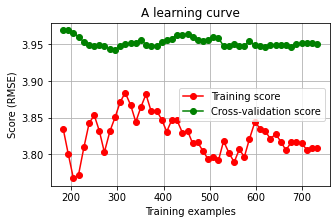

In [26]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=3, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [42]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max() 
    print(x_min-k, x_max+k, h)
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()
    

C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


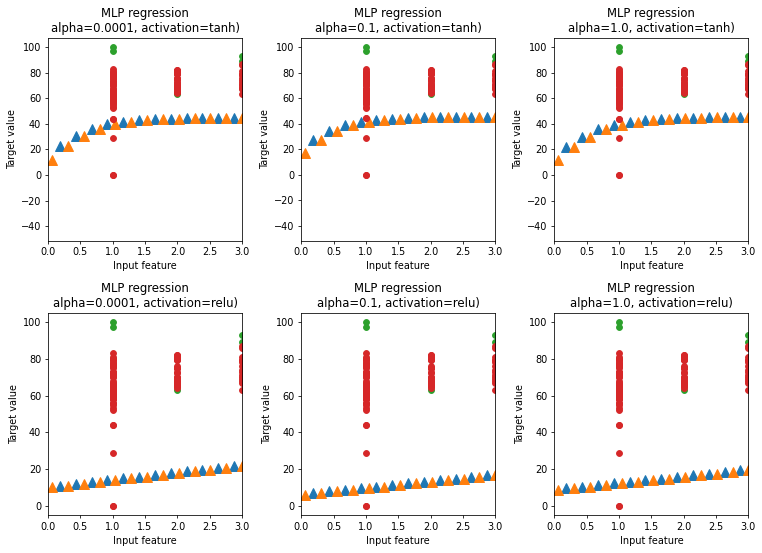

In [52]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-2,2)


X_train, X_test, y_train, y_test = train_test_split(X[0::5], y[0::5].ravel(), random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu', 'logistic']):
    for thisalpha, thisaxis in zip([0.0001, 0.1, 1.0, 100], thisaxisrow):
        # create a model
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'adam').fit(X_train, y_train)
        
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([0, 3])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5 200.5 0.03


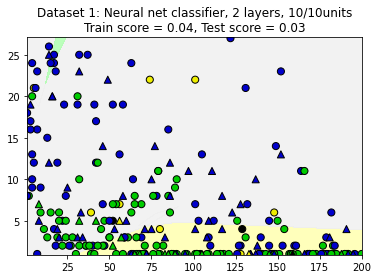

0.5 200.5 0.03


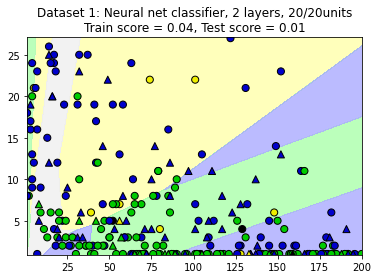

0.5 200.5 0.03


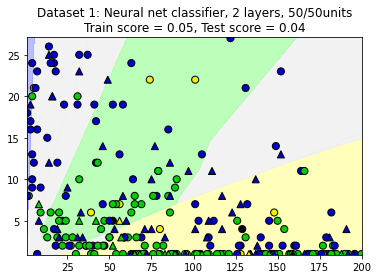

In [44]:
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
for i in [10,20,50]:
    
    #from adspy_shared_utilities import plot_class_regions_for_classifier
    X_train, X_test, y_train, y_test = train_test_split(X[0::5], y[0::5].ravel(), random_state = 0)
    # model training with two hidden layers
    nnclf = MLPClassifier(hidden_layer_sizes = [i, i], solver='adam',
                        random_state = 0).fit(X_train, y_train.ravel())
    plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                    'Dataset 1: Neural net classifier, 2 layers, ' + str(i) + '/' + str(i) + 'units')

C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


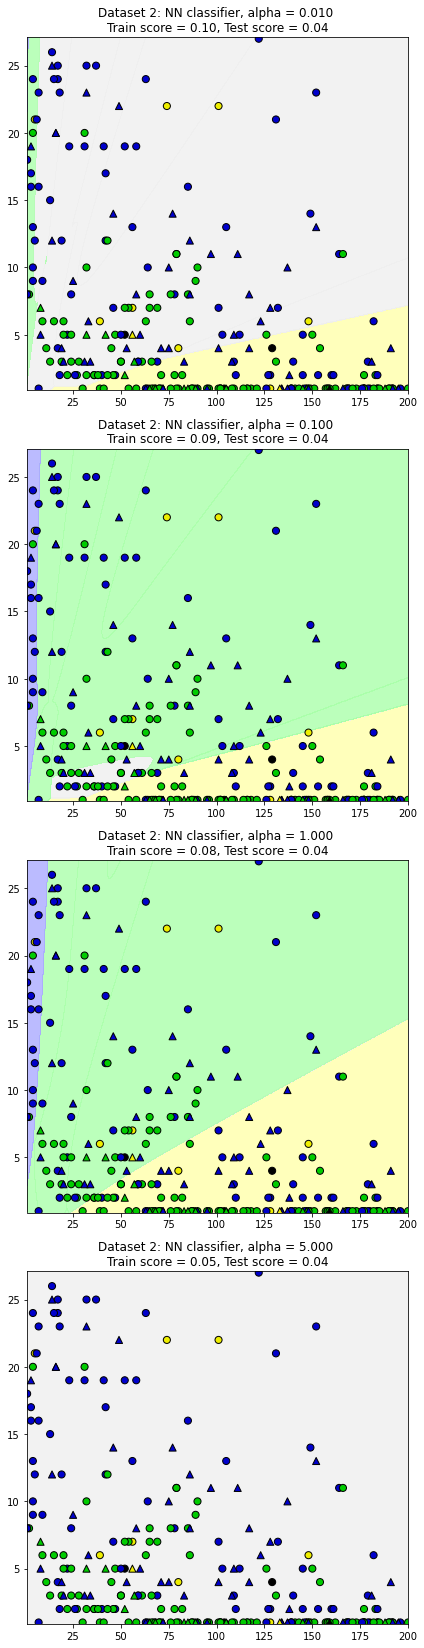

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X[0::5], y[0::5].ravel(), random_state = 0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='adam', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [50, 50],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


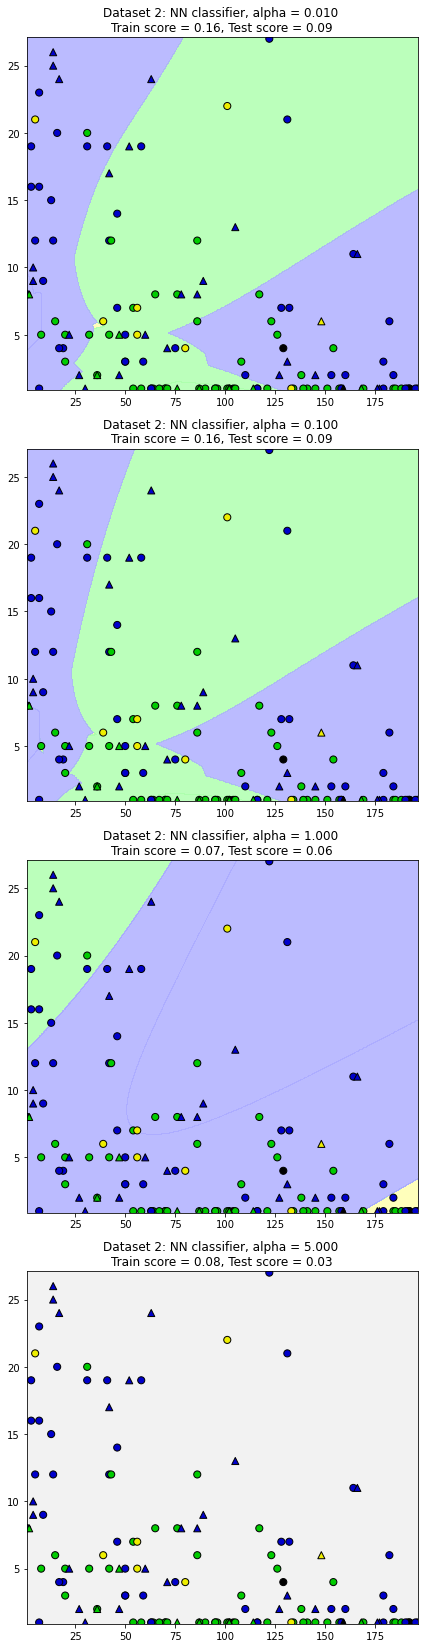

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X[0::10], y[0::10].ravel(), random_state = 0)
fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='adam', activation = 'logistic',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\seang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


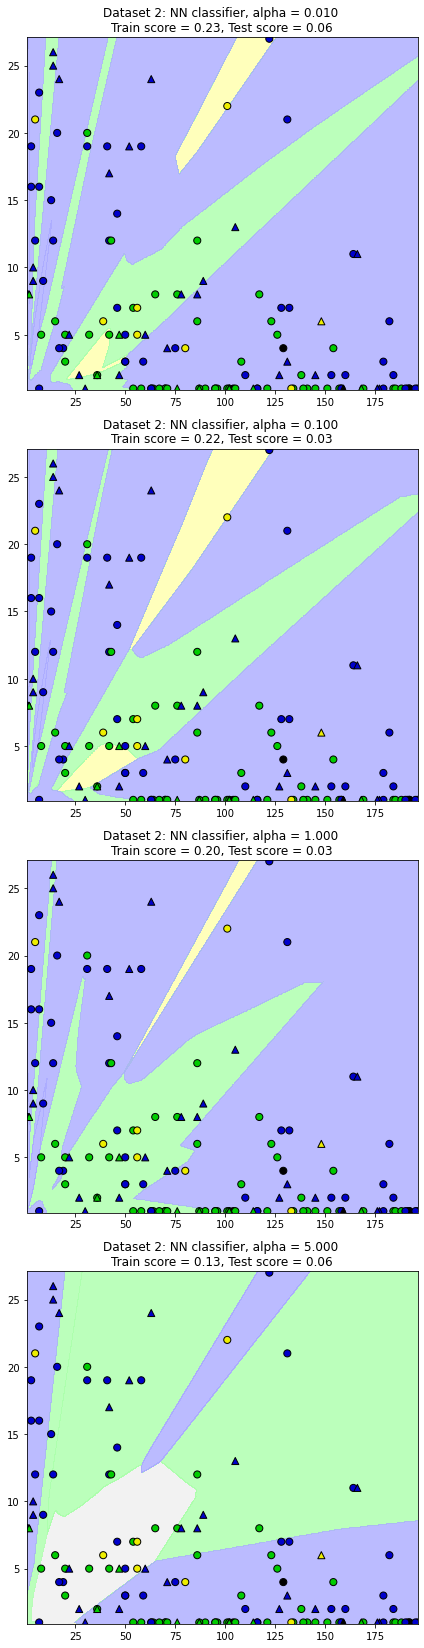

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X[0::10], y[0::10].ravel(), random_state = 0)
fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='adam', activation = 'relu',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

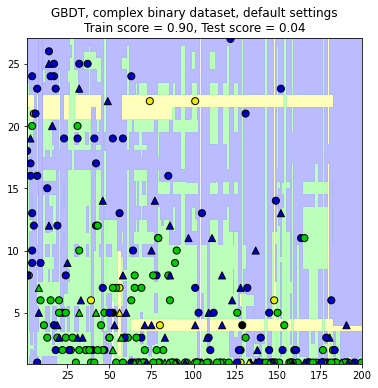

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[0::5], y[0::5].ravel(), random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()


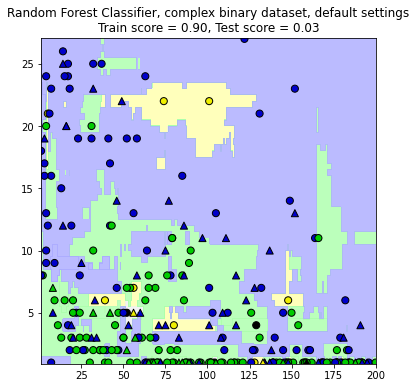

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

X_train, X_test, y_train, y_test = train_test_split(X[0::5], y[0::5].ravel(), random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()